## - Polynomial Regression

### Steps: 
1. Import all the modules
2. Load the dataset
3. Seperate data into independent and dependent features
4. Split data into train and test
5. Model training (Linear Regression)
6. Apply polynomial features
7. Model Prediction
8. Model Evaluation

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
df = pd.read_csv("csv/boston_house.csv")

In [43]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [44]:
# x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
#          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']]

X = df.iloc[:, :-1]

In [45]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [46]:
y = df[['MEDV']]

In [47]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Step 4 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [50]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


In [51]:
y_train

,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [52]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


### Step 5

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [55]:
X_train[:3]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83


In [56]:
y_train[:3]


,MEDV
477,12.0
15,19.9
332,19.4


In [57]:
y_pred_train[:3]


array([[10.96952405],
       [19.41196567],
       [23.06419602]])

In [58]:
y_test[:3]


,MEDV
173,23.6
274,32.4
491,13.6


In [59]:
y_pred_test[:3]


array([[28.99672362],
       [36.02556534],
       [14.81694405]])

In [87]:
def training_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    print(f'R2_Score : {r2}')

    plt.scatter(actual, predicted)
    plt.plot([actual.min()], [actual.max()], [actual.min()], [actual.max()], ls='--', lw=2)
    plt.show

MSE : 21.641412753226316
RMSE : 4.6520331848801675
MAE : 3.314771626783229
R2_Score : 0.7508856358979672


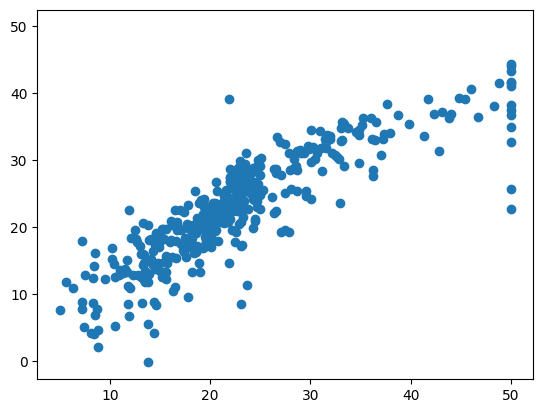

In [88]:
training_evaluation(y_train, y_pred_train)


MSE : 24.291119474973545
RMSE : 4.9286021826653394
MAE : 3.1890919658878487
R2_Score : 0.6687594935356316


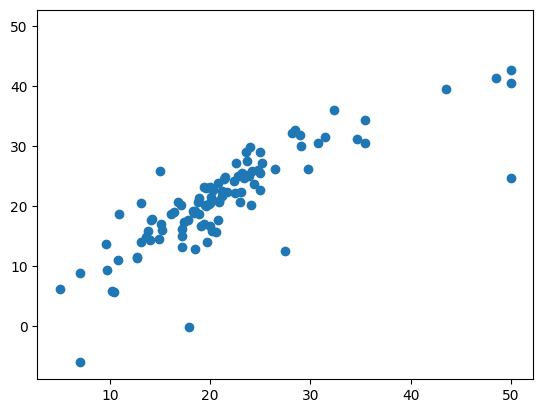

In [89]:
training_evaluation(y_test, y_pred_test)


### Step 6

In [64]:
poly = PolynomialFeatures(degree=2)


In [65]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [66]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [67]:
X_train_poly

array([[1.00000000e+00, 1.50234000e+01, 0.00000000e+00, ...,
        1.22136270e+05, 8.70554680e+03, 6.20508100e+02],
       [1.00000000e+00, 6.27390000e-01, 0.00000000e+00, ...,
        1.56515184e+05, 3.35090140e+03, 7.17409000e+01],
       [1.00000000e+00, 3.46600000e-02, 3.50000000e+01, ...,
        1.31225062e+05, 2.83641750e+03, 6.13089000e+01],
       ...,
       [1.00000000e+00, 1.50100000e-02, 8.00000000e+01, ...,
        1.52834084e+05, 2.34173060e+03, 3.58801000e+01],
       [1.00000000e+00, 1.11604000e+01, 0.00000000e+00, ...,
        1.20670225e+04, 2.55620950e+03, 5.41492900e+02],
       [1.00000000e+00, 2.28760000e-01, 0.00000000e+00, ...,
        5.01264000e+03, 7.52604000e+02, 1.12996900e+02]])

In [68]:
poly = LinearRegression()
poly.fit(X_train_poly, y_train)

LinearRegression()

In [71]:
y_train_pred_poly = poly.predict(X_train_poly)
y_test_pred_poly = poly.predict(X_test_poly)

In [72]:
y_train

,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [75]:
y_pred_train[:3]

array([[10.96952405],
       [19.41196567],
       [23.06419602]])

In [76]:
y_train_pred_poly[:3]


array([[11.82400447],
       [19.01728946],
       [19.09960228]])

MSE : 21.641412753226316
RMSE : 4.6520331848801675
MAE : 3.314771626783229
R2_Score : 0.7508856358979672


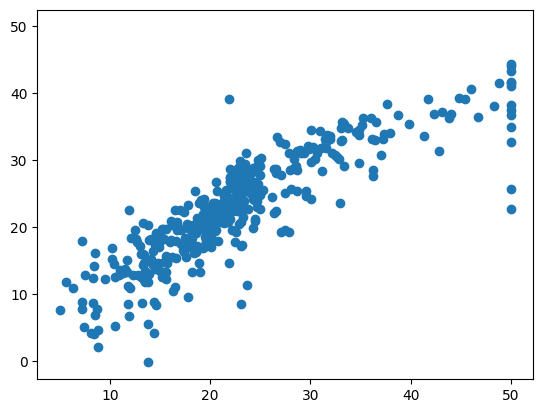

In [90]:
training_evaluation(y_train, y_pred_train)

MSE : 5.626164362915981
RMSE : 2.3719537016805328
MAE : 1.839527099055819
R2_Score : 0.9352372059262911


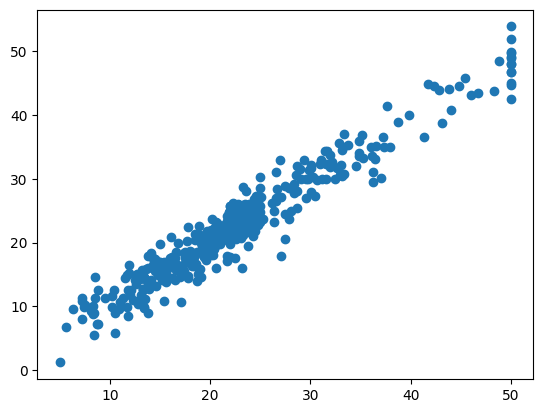

In [91]:
training_evaluation(y_train, y_train_pred_poly)


MSE : 24.291119474973545
RMSE : 4.9286021826653394
MAE : 3.1890919658878487
R2_Score : 0.6687594935356316


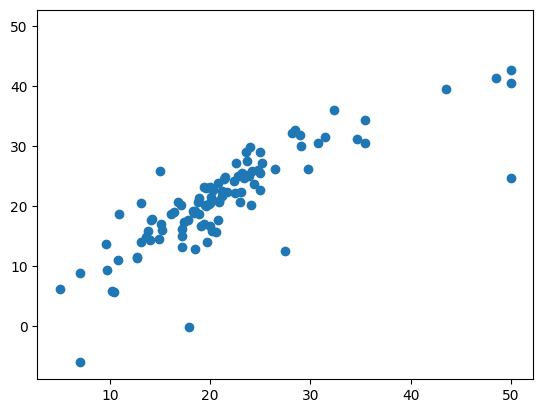

In [92]:
training_evaluation(y_test, y_pred_test)


MSE : 14.566436062347284
RMSE : 3.816600065810837
MAE : 2.643128861866744
R2_Score : 0.8013679993775582


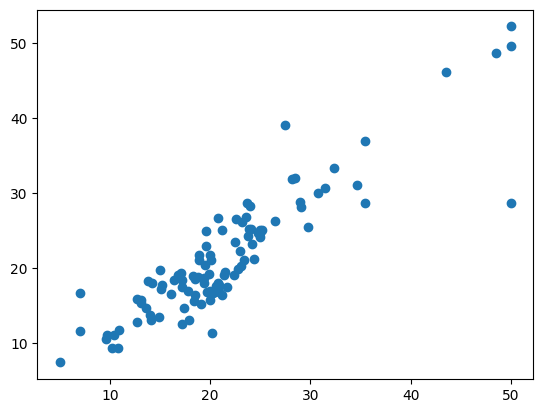

In [93]:
training_evaluation(y_test, y_test_pred_poly)
